# Import important libraries

In [767]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# Load dataset for used car

In [768]:
df = pd.read_csv('train-data.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [769]:
df.shape

(6019, 14)

In [770]:
df = df.drop(["Unnamed: 0"], axis = 1)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [771]:
df[['num_mileages','unit_mileages']] = df['Mileage'].str.split(' ', expand=True)
df = df.drop(['Mileage'], axis = 1)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,num_mileages,unit_mileages
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,998 CC,58.16 bhp,5.0,NaN,1.75,26.6,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.2,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1968 CC,140.8 bhp,5.0,NaN,17.74,15.2,kmpl


In [772]:
df['unit_mileages'].value_counts()

kmpl     5951
km/kg      66
Name: unit_mileages, dtype: int64

In [773]:
df = df.drop(['unit_mileages'], axis = 1)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,num_mileages
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,998 CC,58.16 bhp,5.0,NaN,1.75,26.6
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.2
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1968 CC,140.8 bhp,5.0,NaN,17.74,15.2


In [774]:
df[['num_engine', 'unit_engine']] = df['Engine'].str.split(' ', expand = True)
df[['num_power', 'unit_power']] = df['Power'].str.split(' ', expand = True)
df = df.drop(['Engine', 'Power'], axis = 1)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,num_mileages,num_engine,unit_engine,num_power,unit_power
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,NaN,1.75,26.6,998,CC,58.16,bhp
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,NaN,12.50,19.67,1582,CC,126.2,bhp
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,8.61 Lakh,4.50,18.2,1199,CC,88.7,bhp
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,NaN,6.00,20.77,1248,CC,88.76,bhp
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,NaN,17.74,15.2,1968,CC,140.8,bhp


In [775]:
print(df['unit_engine'].value_counts())
df['unit_power'].value_counts()

CC    5983
Name: unit_engine, dtype: int64


bhp    5983
Name: unit_power, dtype: int64

In [776]:
df = df.drop(['unit_engine', 'unit_power'], axis = 1)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,num_mileages,num_engine,num_power
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,NaN,1.75,26.6,998,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,NaN,12.50,19.67,1582,126.2
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,8.61 Lakh,4.50,18.2,1199,88.7
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,NaN,6.00,20.77,1248,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,NaN,17.74,15.2,1968,140.8


In [777]:
df[['newPrice', 'Unit']] = df['New_Price'].str.split(' ', expand= True)
df = df.drop(['New_Price'], axis = 1)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,num_mileages,num_engine,num_power,newPrice,Unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,26.6,998,58.16,NaN,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,1582,126.2,NaN,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,18.2,1199,88.7,8.61,Lakh
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,1248,88.76,NaN,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.2,1968,140.8,NaN,NaN


In [778]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Seats              5977 non-null   float64
 8   Price              6019 non-null   float64
 9   num_mileages       6017 non-null   object 
 10  num_engine         5983 non-null   object 
 11  num_power          5983 non-null   object 
 12  newPrice           824 non-null    object 
 13  Unit               824 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 658.5+ KB


In [779]:
df = df.drop(['Unit'], axis= 1)
df['num_mileages'] = df['num_mileages'].astype(float)
df['num_engine'] = df['num_engine'].astype(float)
df['num_power'] = pd.to_numeric(df['num_power'], errors='coerce')
df['newPrice'] = pd.to_numeric(df['newPrice'], errors='coerce')
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,num_mileages,num_engine,num_power,newPrice
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,26.60,998.0,58.16,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,1582.0,126.20,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,18.20,1199.0,88.70,8.61
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,1248.0,88.76,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.20,1968.0,140.80,NaN


In [780]:
df = df.fillna(df.mean())

/tmp/ipykernel_15802/114435927.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [781]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Price                0
num_mileages         0
num_engine           0
num_power            0
newPrice             0
dtype: int64

In [782]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,num_mileages,num_engine,num_power,newPrice
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,26.60,998.0,58.16,20.320716
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,1582.0,126.20,20.320716
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,18.20,1199.0,88.70,8.610000
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,1248.0,88.76,20.320716
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.20,1968.0,140.80,20.320716


## Categorical Colummns

In [783]:
categorical_col = df.select_dtypes(include = ['object']).columns.to_list()
categorical_col

['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

## Numerical Columns 

In [784]:
numerical_col = df.select_dtypes(exclude = ['object']).columns.to_list()
numerical_col

['Year',
 'Kilometers_Driven',
 'Seats',
 'Price',
 'num_mileages',
 'num_engine',
 'num_power',
 'newPrice']

In [785]:
ordinal_encoder = OrdinalEncoder()
encoded_categorical_cols = ordinal_encoder.fit_transform(df[categorical_col])
encoded_categorical_df = pd.DataFrame(encoded_categorical_cols, columns= categorical_col)

numerical_df = df.drop(categorical_col, axis = 1)
df = pd.concat([numerical_df, encoded_categorical_df], axis = 1)
df.head()

,Year,Kilometers_Driven,Seats,Price,num_mileages,num_engine,num_power,newPrice,Name,Location,Fuel_Type,Transmission,Owner_Type
0,2010,72000,5.0,1.75,26.60,998.0,58.16,20.320716,1200.0,9.0,0.0,1.0,0.0
1,2015,41000,5.0,12.50,19.67,1582.0,126.20,20.320716,512.0,10.0,1.0,1.0,0.0
2,2011,46000,5.0,4.50,18.20,1199.0,88.70,8.610000,486.0,2.0,4.0,1.0,0.0
3,2012,87000,7.0,6.00,20.77,1248.0,88.76,20.320716,1059.0,2.0,1.0,1.0,0.0
4,2013,40670,5.0,17.74,15.20,1968.0,140.80,20.320716,23.0,3.0,1.0,0.0,2.0


In [786]:
price_column = df.pop('Price')
df = pd.concat([price_column, df], axis = 1)
df.head()

,Price,Year,Kilometers_Driven,Seats,num_mileages,num_engine,num_power,newPrice,Name,Location,Fuel_Type,Transmission,Owner_Type
0,1.75,2010,72000,5.0,26.60,998.0,58.16,20.320716,1200.0,9.0,0.0,1.0,0.0
1,12.50,2015,41000,5.0,19.67,1582.0,126.20,20.320716,512.0,10.0,1.0,1.0,0.0
2,4.50,2011,46000,5.0,18.20,1199.0,88.70,8.610000,486.0,2.0,4.0,1.0,0.0
3,6.00,2012,87000,7.0,20.77,1248.0,88.76,20.320716,1059.0,2.0,1.0,1.0,0.0
4,17.74,2013,40670,5.0,15.20,1968.0,140.80,20.320716,23.0,3.0,1.0,0.0,2.0


In [787]:
df.describe()

,Price,Year,Kilometers_Driven,Seats,num_mileages,num_engine,num_power,newPrice,Name,Location,Fuel_Type,Transmission,Owner_Type
count,6019.000000,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,9.479468,2013.358199,5.873838e+04,5.278735,18.134961,1621.276450,113.253050,20.320716,915.975577,5.619704,2.363017,0.714238,0.379465
std,11.187917,3.269742,9.126884e+04,0.806012,4.581528,599.553865,53.231019,7.469383,529.812042,2.955933,1.504939,0.451814,0.818458
min,0.440000,1998.000000,1.710000e+02,0.000000,0.000000,72.000000,34.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,2011.000000,3.400000e+04,5.000000,15.170000,1198.000000,78.000000,20.320716,472.000000,3.000000,1.000000,0.000000,0.000000
50%,5.640000,2014.000000,5.300000e+04,5.000000,18.150000,1493.000000,98.600000,20.320716,924.000000,6.000000,1.000000,1.000000,0.000000
75%,9.950000,2016.000000,7.300000e+04,5.000000,21.100000,1969.000000,138.030000,20.320716,1314.000000,8.000000,4.000000,1.000000,0.000000
max,160.000000,2019.000000,6.500000e+06,10.000000,33.540000,5998.000000,560.000000,99.920000,1875.000000,10.000000,4.000000,1.000000,3.000000


<Axes: >

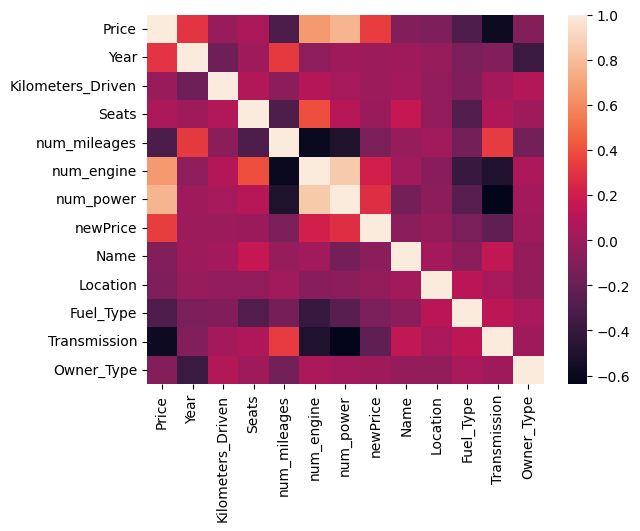

In [788]:
sns.heatmap(df.corr())

# Recursicve Feature Elimination

In [789]:
rfe_x = df.drop(['Price'], axis = 1)
rfe_y = df[numerical_col]['Price']

In [790]:
random_forest_model = RandomForestRegressor()
rfecv = RFE(estimator = random_forest_model, n_features_to_select = 12, step = 1)
rfecv.fit(rfe_x, rfe_y)
important_features = rfe_x.columns[rfecv.support_]
important_features

Index(['Year', 'Kilometers_Driven', 'Seats', 'num_mileages', 'num_engine',
       'num_power', 'newPrice', 'Name', 'Location', 'Fuel_Type',
       'Transmission', 'Owner_Type'],
      dtype='object')

In [791]:
df = pd.concat([df['Price'],df[list(important_features)]], axis = 1)
df.head()

,Price,Year,Kilometers_Driven,Seats,num_mileages,num_engine,num_power,newPrice,Name,Location,Fuel_Type,Transmission,Owner_Type
0,1.75,2010,72000,5.0,26.60,998.0,58.16,20.320716,1200.0,9.0,0.0,1.0,0.0
1,12.50,2015,41000,5.0,19.67,1582.0,126.20,20.320716,512.0,10.0,1.0,1.0,0.0
2,4.50,2011,46000,5.0,18.20,1199.0,88.70,8.610000,486.0,2.0,4.0,1.0,0.0
3,6.00,2012,87000,7.0,20.77,1248.0,88.76,20.320716,1059.0,2.0,1.0,1.0,0.0
4,17.74,2013,40670,5.0,15.20,1968.0,140.80,20.320716,23.0,3.0,1.0,0.0,2.0


In [792]:
nomalizer = StandardScaler()
df = nomalizer.fit_transform(df)

## Split the dataset

In [793]:
X = df[ : , 1 :]
y = df[ : , 0]
print(X.shape)
y.shape

(6019, 12)


(6019,)

In [794]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, train_size = 0.8, shuffle= True)

In [795]:
random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(X_train, y_train)
train_pred = random_forest_regressor.predict(X_train)
test_pred = random_forest_regressor.predict(X_test)

print("R2-score of train set :", r2_score(y_train, train_pred))
print("R2-score of test set :",r2_score(y_test, test_pred))
print("MSE of train set : ", mean_squared_error(y_train, train_pred))
print("MSE of test set : ", mean_squared_error(y_test, test_pred))
print("MAE of train set : ", mean_absolute_error(y_train, train_pred))
print("MAE of test set : ", mean_absolute_error(y_test, test_pred))

R2-score of train set : 0.9831695192685678
R2-score of test set : 0.9257847699849865
MSE of train set :  0.016486741168823118
MSE of test set :  0.07997789752044683
MAE of train set :  0.0497662120745197
MAE of test set :  0.12743985998022797


## Save the model

In [796]:
joblib.dump(random_forest_regressor, 'random_forest_model.pkl')

['random_forest_model.pkl']

## Save the important features

In [797]:
import pickle
with open('important_features.pkl', 'wb') as file:
    pickle.dump(list(important_features), file)